In [ ]:
# default_exp compare

In [ ]:
# hide
import sys

sys.path.append("..")
import pandas as pd

/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)
/home/tako/dev/env37/lib/python3.7/site-packages/pandas/compat/__init__.py:85: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


# Compare

> Compare learners 


In [ ]:
# hide
from nbdev.showdoc import *
from fastcore.test import *

In [ ]:
#export
from fastcore.utils import *
from fastcore.imports import *
from fastai.basics import *
from fastseq.data.all import *
from fastseq.nbeats.learner import *


In [ ]:
df = pd.read_csv('/home/tako/dev/fastseq/data/airline-passengers.csv')
print(df.head())
items = L([np.array(list(df['Passengers'].values))])
items

     Month  Passengers
0  1949-01         112
1  1949-02         118
2  1949-03         132
3  1949-04         129
4  1949-05         121


(#1) [array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348, 355, 422, 465, 467,
       404, 347, 305, 336, 340, 318, 362, 348, 363, 435, 491, 505, 404,
       359, 310, 337, 360, 342, 406, 396, 420, 472, 548, 559, 463, 407,
       362, 405, 417, 391, 419, 461, 472, 535, 622, 606, 508, 461, 390,
       432])]

(1, 144)
Train:67; Valid: 19; Test 1


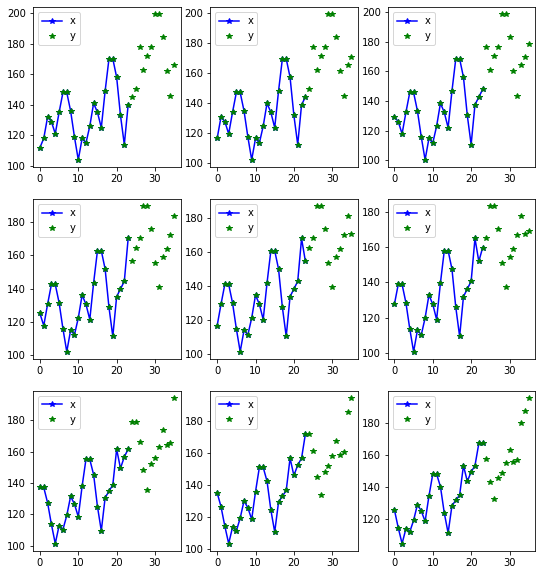

In [ ]:
horizon, lookback = 12,24
data = TSDataLoaders.from_items(items, lookback=lookback, horizon =horizon, step=1, bs=64)
data.show_batch()

In [ ]:
# export
import seaborn as sns
def _compare(learn, lr, epochs):
    learn.fit(epochs, lr)
    return {k:v for k,v in zip(L('loss',*[o.name for o in learn.metrics]),learn.validate())}

def compare(learner,kwargs1, kwargs2, lr=5e-1, epochs= [5, 5,5,5], iterations=5):
    epochs =L(epochs)
    res = []
    for _ in range(iterations):
        learn = learner(**kwargs1)
        for i, epoch in enumerate(epochs):
            _res = _compare(learn, lr, epoch)
            _res['learner']='base'
            _res['epochs'] = sum(epochs[:i])
            res.append(_res)            
            
    diff = {k : kwargs2[k] for k in set(kwargs2)- set(kwargs1)}
    print(diff)
    for _ in range(iterations):
        learn = learner(**kwargs2)
        for i, epoch in enumerate(epochs):
            _res = _compare(learn, lr, epoch)
            _res['learner']= str(diff)
            _res['epochs'] = sum(epochs[:i])
            res.append(_res)      
        res.append(_res)
    df =pd.DataFrame(res)
    sns.catplot(data=df, x='learner',y='loss', hue='epochs')
    return res
    

epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,3.072110,3.648259,1.555672,1.424748,3.187010,3.854019,00:00
1,3.112219,3.220170,1.401412,1.407543,3.015318,3.101240,00:00
2,2.795260,2.788341,1.295898,1.485372,2.916590,2.738270,00:00
3,2.571425,2.305565,1.215151,1.523750,2.232401,2.679343,00:00
4,2.436491,2.941024,1.353994,1.450652,2.671736,2.530462,00:00
5,2.350085,3.180106,1.418748,1.415661,3.347284,2.517437,00:00
6,2.294848,2.909725,1.334497,1.445293,2.553226,2.570886,00:00
7,2.251811,2.326272,1.209426,1.411895,1.815220,2.526041,00:00
8,2.213427,2.318274,1.194452,1.399072,1.805832,2.479680,00:00
9,2.171967,2.257395,1.187139,1.375942,2.025172,2.245497,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.742129,2.616007,1.289009,1.383386,2.221987,2.118374,00:00
1,1.732851,3.085518,1.396976,1.409573,2.552604,2.269514,00:00
2,1.719057,2.901554,1.355673,1.369592,2.448547,2.089947,00:00
3,1.708454,2.107993,1.161785,1.392351,1.873339,2.157766,00:00
4,1.710285,2.361016,1.217187,1.367855,2.080114,2.152760,00:00
5,1.710868,2.870318,1.297868,1.394656,2.181687,2.253637,00:00
6,1.710861,3.056200,1.354264,1.416789,2.240201,2.209163,00:00
7,1.704238,2.412548,1.207303,1.413673,2.101271,2.048023,00:00
8,1.700731,2.171014,1.160919,1.428278,1.965318,1.953284,00:00
9,1.696229,2.674698,1.270986,1.435089,2.605083,1.870349,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.662863,2.112557,1.110584,1.391217,2.132303,1.776066,00:00
1,1.655486,2.421380,1.172462,1.380296,2.526815,1.754611,00:00
2,1.655492,2.331133,1.178496,1.396009,2.174137,1.689698,00:00
3,1.655011,2.407944,1.205448,1.436767,2.148432,1.707245,00:00
4,1.651091,2.476256,1.191799,1.396786,2.265752,1.737973,00:00
5,1.649117,2.452555,1.181477,1.391755,2.152583,1.741518,00:00
6,1.647450,2.253420,1.142508,1.401232,2.078117,1.673999,00:00
7,1.645765,2.144928,1.139026,1.418940,2.041675,1.640691,00:00
8,1.643674,2.224112,1.136420,1.383191,2.144959,1.579905,00:00
9,1.641661,2.433940,1.204849,1.390622,2.244113,1.655897,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.627123,2.309788,1.177557,1.406790,2.146802,1.706250,00:00
1,1.626775,2.357654,1.202621,1.433462,2.147944,1.677303,00:00
2,1.626473,2.494511,1.253846,1.435209,2.328092,1.661513,00:00
3,1.626070,2.431906,1.226508,1.436194,2.290785,1.764722,00:00
4,1.625828,2.300116,1.180344,1.424277,2.133052,1.773476,00:00
5,1.625780,2.494175,1.219262,1.457236,2.141393,1.866747,00:00
6,1.625806,2.505623,1.221269,1.468641,2.007926,1.797572,00:00
7,1.625826,2.436940,1.196543,1.450267,1.991879,1.820226,00:00
8,1.626194,2.608214,1.238177,1.449675,1.882285,1.954705,00:00
9,1.626489,2.742920,1.289579,1.492588,2.156632,1.902211,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.628663,2.821923,1.302370,1.469820,2.121363,1.984343,00:00
1,1.628663,2.409065,1.209028,1.449388,1.868873,1.890457,00:00
2,1.628663,2.370160,1.214641,1.457386,2.134205,1.939553,00:00
3,1.628663,2.353674,1.202017,1.434514,2.144090,1.988679,00:00
4,1.628663,2.234230,1.171564,1.447605,1.816609,1.850699,00:00
5,1.628663,2.103726,1.139067,1.446769,1.707669,1.805085,00:00
6,1.628663,2.374786,1.216095,1.437442,1.962035,1.968243,00:00
7,1.628661,2.628320,1.253268,1.418079,1.843362,2.006840,00:00
8,1.628623,2.638592,1.257288,1.432313,1.922309,1.986375,00:00
9,1.628591,2.558214,1.251040,1.455340,1.940444,1.995147,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.614382,2.857205,1.308921,1.451518,1.956584,2.235818,00:00
1,1.614364,2.440225,1.227091,1.428098,1.888043,2.091079,00:00
2,1.614154,2.336958,1.202312,1.432610,1.933832,2.079676,00:00
3,1.614048,2.230438,1.176810,1.442950,1.707676,2.060377,00:00
4,1.613986,2.339879,1.198665,1.459708,1.783049,2.151605,00:00
5,1.613944,2.487458,1.231038,1.460344,1.872855,2.133184,00:00
6,1.613914,2.563035,1.254730,1.436874,1.901207,2.151605,00:00
7,1.613891,2.409756,1.217749,1.443736,1.921566,2.154237,00:00
8,1.613874,2.552452,1.260593,1.468829,1.988790,2.263886,00:00
9,1.613860,2.474312,1.229506,1.441481,1.905532,2.183184,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.613758,2.339798,1.196294,1.424436,1.840876,2.226746,00:00
1,1.613758,2.375992,1.197435,1.424215,1.800833,2.219465,00:00
2,1.613758,2.296847,1.183344,1.421165,1.819959,2.219465,00:00
3,1.613758,2.252502,1.175445,1.404292,1.842017,2.137009,00:00
4,1.613758,2.252502,1.175445,1.404292,1.842017,2.137009,00:00
5,1.613758,2.338448,1.202990,1.423078,1.813519,2.151044,00:00
6,1.613758,2.351713,1.206292,1.431505,1.800213,2.178237,00:00
7,1.613758,2.351713,1.201936,1.431554,1.794507,2.158062,00:00
8,1.613758,2.405987,1.192997,1.430803,1.617010,2.178585,00:00
9,1.613758,2.298610,1.179510,1.437019,1.645721,2.116034,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.613758,2.287329,1.181008,1.434178,1.733456,2.143468,00:00
1,1.613758,2.286895,1.178228,1.436992,1.728900,2.143468,00:00
2,1.613758,2.239497,1.163557,1.442291,1.689837,2.118030,00:00
3,1.613758,2.239497,1.163557,1.442291,1.689837,2.118030,00:00
4,1.613758,2.346319,1.194294,1.434159,1.870407,2.136470,00:00
5,1.613758,2.352180,1.196092,1.432502,1.904168,2.148732,00:00
6,1.613758,2.369649,1.204453,1.439233,1.938519,2.175047,00:00
7,1.613758,2.376701,1.209302,1.436331,1.973747,2.186451,00:00
8,1.613758,2.376701,1.209302,1.436331,1.973747,2.186451,00:00
9,1.613758,2.432273,1.228248,1.440166,2.060654,2.248372,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.613758,2.415708,1.224810,1.435385,2.014778,2.222056,00:00
1,1.613758,2.419058,1.227834,1.426701,2.069539,2.148732,00:00
2,1.613758,2.409441,1.224598,1.420639,2.057725,2.161890,00:00
3,1.613758,2.212586,1.157521,1.404903,1.812152,2.182942,00:00
4,1.613758,2.204346,1.151882,1.406464,1.832260,2.177679,00:00
5,1.613758,2.205665,1.148519,1.412423,1.807295,2.164521,00:00
6,1.613758,2.095738,1.115721,1.408562,1.694295,2.125925,00:00
7,1.613758,2.131878,1.128634,1.408984,1.718286,2.146977,00:00
8,1.613758,2.131878,1.128634,1.408984,1.718286,2.146977,00:00
9,1.613758,2.131878,1.128634,1.408984,1.718286,2.146977,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.613758,2.104593,1.119211,1.394630,1.734948,2.163644,00:00
1,1.613758,2.104593,1.119211,1.394630,1.734948,2.163644,00:00
2,1.613758,2.095982,1.115339,1.384563,1.705483,2.138205,00:00
3,1.613758,2.138390,1.125510,1.389296,1.753568,2.125047,00:00
4,1.613758,2.074429,1.107659,1.396380,1.749761,2.085574,00:00
5,1.613758,2.231371,1.150226,1.388745,2.041455,2.140837,00:00
6,1.613758,2.253534,1.152984,1.382058,2.071391,2.149609,00:00
7,1.613758,2.343081,1.180595,1.386952,2.105532,2.178521,00:00
8,1.613758,2.339870,1.171548,1.379713,2.146771,2.207469,00:00
9,1.613758,2.339870,1.171548,1.379713,2.146771,2.207469,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.875735,3.328658,1.471768,1.482492,2.335601,3.059624,00:00
1,2.933458,3.822348,1.564551,1.418191,3.174384,3.309456,00:00
2,2.871920,3.326445,1.478548,1.450972,2.835192,3.155637,00:00
3,2.832226,3.622826,1.487123,1.434415,2.775197,3.200702,00:00
4,2.733747,3.283543,1.433347,1.443386,2.880633,3.509380,00:00
5,2.665707,3.107990,1.431190,1.415995,2.744990,3.433336,00:00
6,2.625456,2.831186,1.357530,1.395057,2.671849,3.244976,00:00
7,2.568663,3.172539,1.442469,1.395611,3.264876,3.079770,00:00
8,2.532028,2.907225,1.337140,1.321749,2.927305,2.789355,00:00
9,2.498400,2.447409,1.215062,1.323174,2.341099,2.460425,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.241559,2.438705,1.227529,1.340313,2.664728,2.535227,00:00
1,2.315969,2.300041,1.211304,1.344445,2.214065,2.273478,00:00
2,2.349646,2.021012,1.119841,1.329061,2.160069,2.113282,00:00
3,2.369933,2.156142,1.164857,1.364941,2.165385,2.026022,00:00
4,2.382838,2.165956,1.159367,1.325359,2.169117,1.909074,00:00
5,2.391812,2.150651,1.159497,1.377033,1.895268,1.710793,00:00
6,2.396002,1.941681,1.094927,1.362908,1.874911,1.666707,00:00
7,2.400622,2.105386,1.143179,1.368772,2.046646,1.633349,00:00
8,2.403653,1.985021,1.090968,1.344877,1.925792,1.596397,00:00
9,2.430725,2.073444,1.143704,1.379097,1.953791,1.575650,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.614313,2.021533,1.128042,1.365771,1.891420,1.696887,00:00
1,2.625241,2.516987,1.262452,1.410481,2.397771,2.025345,00:00
2,2.611477,2.345635,1.226338,1.386620,2.441042,2.129129,00:00
3,2.606547,2.816159,1.300732,1.405051,2.962537,2.088609,00:00
4,2.604999,2.635847,1.265601,1.376246,3.004048,2.134875,00:00
5,2.598711,2.462223,1.240275,1.358981,2.667933,2.147413,00:00
6,2.595056,2.549144,1.257349,1.391978,2.769586,2.093153,00:00
7,2.591533,2.759423,1.328007,1.438943,2.786014,2.128457,00:00
8,2.587453,2.662561,1.289973,1.435792,2.616030,2.086717,00:00
9,2.583656,2.877813,1.330608,1.417934,2.851249,2.150554,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.525736,2.514259,1.254964,1.424308,2.484028,2.056755,00:00
1,2.523209,2.659166,1.305845,1.420858,2.105093,2.951440,00:00
2,2.545676,2.406092,1.249306,1.452808,2.001480,2.446466,00:00
3,2.545833,2.713902,1.330742,1.429044,2.562444,2.445360,00:00
4,2.546858,2.457512,1.290606,1.449717,2.120273,2.658298,00:00
5,2.544958,2.560575,1.284532,1.433586,2.128639,2.690998,00:00
6,2.540096,2.359976,1.243736,1.460437,1.978926,2.645647,00:00
7,2.528872,2.816857,1.377500,1.519962,2.393005,3.061437,00:00
8,2.519999,3.002765,1.399372,1.481545,2.887462,3.240972,00:00
9,2.512774,2.522039,1.295116,1.470863,2.292103,3.370799,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.463353,2.991396,1.411287,1.520859,3.015187,3.462904,00:00
1,2.462183,3.505080,1.481014,1.432604,3.527544,3.205922,00:00
2,2.461372,3.340669,1.445217,1.432861,3.522861,3.024343,00:00
3,2.460381,3.337624,1.451043,1.413712,3.623811,2.971951,00:00
4,2.459786,3.620306,1.545833,1.460782,3.923727,2.746007,00:00
5,2.459558,3.426662,1.508398,1.455364,3.643647,2.777935,00:00
6,2.453247,3.357279,1.486114,1.456981,3.619023,2.786025,00:00
7,2.447468,3.029205,1.399229,1.438495,3.179723,2.732247,00:00
8,2.443137,3.000535,1.390127,1.435140,3.158640,2.657919,00:00
9,2.439729,3.218519,1.425468,1.445475,3.396703,2.685719,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.415211,3.403066,1.478142,1.442128,3.534725,2.865815,00:00
1,2.397645,3.762022,1.591262,1.495420,3.953271,2.772807,00:00
2,2.373351,3.889067,1.602899,1.463258,4.140804,2.870028,00:00
3,2.358002,3.508966,1.519915,1.459930,3.647835,2.847068,00:00
4,2.346878,3.085206,1.404982,1.404805,3.010629,2.751350,00:00
5,2.340247,3.130505,1.426627,1.435258,2.981544,2.720914,00:00
6,2.335517,3.643305,1.550610,1.462267,3.614430,2.729660,00:00
7,2.331846,3.513762,1.516915,1.452107,3.609768,2.843225,00:00
8,2.328905,3.699310,1.561876,1.434138,3.923258,2.930176,00:00
9,2.326559,3.799683,1.586284,1.444334,4.098922,2.919683,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.309210,3.985669,1.632461,1.459275,4.348306,2.982839,00:00
1,2.309210,3.819956,1.598191,1.453313,4.126546,2.956491,00:00
2,2.309210,3.717416,1.555180,1.440237,3.775744,2.926060,00:00
3,2.309210,3.738661,1.556090,1.417457,3.977411,2.934955,00:00
4,2.309210,3.540049,1.508434,1.418463,3.654899,2.858290,00:00
5,2.309086,3.698520,1.552006,1.422142,3.863642,2.890702,00:00
6,2.308829,3.730914,1.558989,1.455585,3.745633,2.728421,00:00
7,2.308458,3.639441,1.543221,1.480174,3.649313,2.773158,00:00
8,2.307933,3.643539,1.543460,1.490847,3.678505,2.829825,00:00
9,2.307513,3.497718,1.506750,1.481188,3.616855,2.794737,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.304412,3.376075,1.486914,1.476921,3.520289,2.750842,00:00
1,2.304412,3.355568,1.482876,1.470459,3.609062,2.777277,00:00
2,2.304105,3.253007,1.455438,1.456839,3.482333,2.650681,00:00
3,2.303683,3.237311,1.448550,1.444119,3.469347,2.631005,00:00
4,2.303430,3.364543,1.482677,1.461154,3.550323,2.623697,00:00
5,2.303262,2.979924,1.403667,1.460540,2.959426,2.496614,00:00
6,2.303142,2.877198,1.368547,1.453479,3.020270,2.491324,00:00
7,2.303052,2.915846,1.373812,1.449938,3.074777,2.501325,00:00
8,2.302983,2.920655,1.374376,1.438028,3.084308,2.523518,00:00
9,2.302927,3.062477,1.410460,1.454577,3.056603,2.552465,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.302515,3.017148,1.415255,1.445928,3.097167,2.607702,00:00
1,2.302515,3.005562,1.414937,1.449505,3.070061,2.626088,00:00
2,2.302515,2.993777,1.409832,1.437373,3.110739,2.605035,00:00
3,2.302515,2.970718,1.397520,1.429040,3.230462,2.626614,00:00
4,2.302515,2.954540,1.392627,1.443635,3.092230,2.553807,00:00
5,2.302515,3.137672,1.433525,1.439835,3.389532,2.591526,00:00
6,2.302515,3.075135,1.415358,1.430153,3.308590,2.595035,00:00
7,2.302515,3.008164,1.388839,1.427441,3.239939,2.603807,00:00
8,2.302515,3.004768,1.386363,1.427771,3.242660,2.651175,00:00
9,2.302515,3.004768,1.386363,1.427771,3.242660,2.651175,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.302515,2.958693,1.373845,1.417672,3.077572,2.628371,00:00
1,2.302515,3.025889,1.403738,1.438437,3.114451,2.652026,00:00
2,2.302515,3.047942,1.418657,1.442869,3.224718,2.698518,00:00
3,2.302515,3.113430,1.428787,1.424633,3.230378,2.637525,00:00
4,2.302515,3.105788,1.419460,1.427281,3.177690,2.546751,00:00
5,2.302515,2.994867,1.399367,1.446423,2.970515,2.459754,00:00
6,2.302515,2.924619,1.361167,1.434761,2.773267,2.478731,00:00
7,2.302515,2.996762,1.380440,1.416657,2.798198,2.590984,00:00
8,2.302515,3.036972,1.393672,1.431070,2.756743,2.540120,00:00
9,2.302515,2.904192,1.374099,1.418280,2.768778,2.540990,00:00


{'share_weights_in_layers': False}


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,3.239475,4.041133,1.609271,1.490729,4.039144,3.440806,00:00
1,4.116425,4.183454,1.608854,1.518576,4.576773,3.595780,00:00
2,3.565553,4.489520,1.683787,1.539073,5.235188,4.046602,00:00
3,3.186938,4.049804,1.630078,1.542988,4.175557,3.813917,00:00
4,2.974855,3.693504,1.598372,1.600958,3.413023,3.870549,00:00
5,2.811598,3.600758,1.526915,1.550628,3.036403,3.854660,00:00
6,2.677744,3.603014,1.534276,1.575578,3.075627,3.859329,00:00
7,2.564978,3.110018,1.412921,1.524350,2.826017,3.770937,00:00
8,2.477755,3.005093,1.392278,1.497938,2.748127,3.527741,00:00
9,2.408130,2.690869,1.329114,1.497532,2.294733,3.291419,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.899710,2.637951,1.300562,1.458118,2.074815,3.198778,00:00
1,1.867786,2.954055,1.375646,1.444985,2.634071,3.069005,00:00
2,1.880987,3.039983,1.385472,1.427578,2.752260,3.057899,00:00
3,1.888121,3.139954,1.391090,1.424130,2.840540,2.980581,00:00
4,1.893002,2.946294,1.352248,1.396962,2.778747,3.030584,00:00
5,1.882086,2.827640,1.328720,1.430432,2.682246,2.806759,00:00
6,1.875900,2.977788,1.357111,1.430820,2.923522,2.847986,00:00
7,1.878314,3.176369,1.399964,1.423631,3.160810,2.733109,00:00
8,1.878085,3.040169,1.379855,1.430187,2.988519,2.682408,00:00
9,1.879410,2.861604,1.344155,1.438100,2.905308,2.819426,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.894115,3.030594,1.387079,1.462713,3.067274,2.871180,00:00
1,1.890123,2.595522,1.299762,1.448206,2.522588,2.630794,00:00
2,1.885584,2.429042,1.256550,1.420731,2.290668,2.749214,00:00
3,1.884820,2.627506,1.314468,1.431551,2.445788,2.712724,00:00
4,1.883741,2.631049,1.306863,1.418131,2.361321,2.608338,00:00
5,1.882833,2.791176,1.330848,1.391291,2.274641,2.628513,00:00
6,1.882186,3.001329,1.390140,1.421762,2.632429,2.791636,00:00
7,1.881837,2.925311,1.387638,1.440933,2.819330,2.924969,00:00
8,1.882085,3.044904,1.435901,1.450650,2.992086,2.951285,00:00
9,1.883293,3.170653,1.450831,1.433486,2.986237,2.993356,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.890489,3.094023,1.430617,1.430438,2.924836,2.960022,00:00
1,1.890452,2.758312,1.357882,1.422946,2.565363,3.108127,00:00
2,1.871236,2.582709,1.308521,1.395120,2.403764,3.216450,00:00
3,1.873915,2.908653,1.382757,1.408121,2.610599,3.139776,00:00
4,1.877896,2.595191,1.306885,1.395862,2.303082,3.149426,00:00
5,1.889283,3.110242,1.405086,1.422307,2.708978,3.097741,00:00
6,1.895544,2.439195,1.215096,1.415683,2.129276,2.971951,00:00
7,1.889608,2.566721,1.257322,1.434934,2.048583,3.044724,00:00
8,1.883472,3.201454,1.421575,1.458250,2.880520,2.749636,00:00
9,1.879403,3.526293,1.476769,1.468591,2.966519,2.582338,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.882998,2.873270,1.298370,1.437229,2.109260,2.584619,00:00
1,1.871832,2.621155,1.265713,1.433249,2.221412,2.535250,00:00
2,1.868079,2.683733,1.319484,1.491143,2.430809,2.576162,00:00
3,1.864529,2.787400,1.346574,1.490220,2.652906,2.648420,00:00
4,1.863855,3.227413,1.424334,1.461001,3.321038,2.784560,00:00
5,1.861009,2.861228,1.342478,1.445634,2.824872,2.575755,00:00
6,1.858979,2.691388,1.305546,1.429057,2.514905,2.524899,00:00
7,1.857210,2.566049,1.287411,1.444158,2.294968,2.488070,00:00
8,1.854319,2.522661,1.263509,1.422280,2.125430,2.453441,00:00
9,1.844401,2.671770,1.298002,1.434401,2.425258,2.549110,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.771059,2.711190,1.309154,1.437516,2.356830,2.435075,00:00
1,1.765323,2.360875,1.214030,1.406429,1.956728,2.290303,00:00
2,1.763412,2.425175,1.235377,1.420254,1.858062,2.276795,00:00
3,1.761479,2.902173,1.352970,1.472565,2.452352,2.361882,00:00
4,1.732329,2.897482,1.351440,1.480564,2.337440,2.393586,00:00
5,1.710251,2.847641,1.338926,1.485735,2.293932,2.434162,00:00
6,1.690237,2.936620,1.359474,1.454425,2.513217,2.485390,00:00
7,1.673702,2.960296,1.341296,1.421453,2.499584,2.220829,00:00
8,1.660870,2.833142,1.326879,1.429600,2.547653,2.283075,00:00
9,1.650630,2.955732,1.351036,1.423823,2.695028,2.319426,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.574914,3.130072,1.362636,1.391832,2.910048,2.435566,00:00
1,1.574914,2.995490,1.342036,1.415022,2.497674,2.547847,00:00
2,1.574914,3.206241,1.405816,1.424170,2.825371,2.518162,00:00
3,1.574914,3.173883,1.415696,1.443775,2.888759,2.544478,00:00
4,1.574914,3.294493,1.438855,1.447069,2.955422,2.561238,00:00
5,1.574914,3.226309,1.419680,1.448059,2.999088,2.631671,00:00
6,1.574914,3.426494,1.456783,1.439607,3.001799,2.697426,00:00
7,1.574914,3.352181,1.444873,1.470562,2.922807,2.757952,00:00
8,1.574914,3.332326,1.433165,1.467446,2.925399,2.695285,00:00
9,1.574914,3.498677,1.457330,1.456436,2.902373,2.707916,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.574914,3.653690,1.477226,1.443587,3.126052,2.674057,00:00
1,1.574914,3.821280,1.504081,1.439679,3.194536,2.761285,00:00
2,1.574914,4.163082,1.580551,1.451118,3.620378,2.806904,00:00
3,1.574914,4.266263,1.588040,1.438134,3.763799,2.940233,00:00
4,1.574914,4.861281,1.721169,1.480451,4.406704,2.977111,00:00
5,1.574914,4.528162,1.658176,1.488110,3.971427,3.000472,00:00
6,1.574914,4.164637,1.577393,1.479781,3.547055,2.958654,00:00
7,1.574914,4.171793,1.569779,1.462766,3.236336,3.002513,00:00
8,1.574914,4.662922,1.678211,1.471250,3.789028,2.970057,00:00
9,1.574914,4.729057,1.706589,1.483512,3.889405,2.968303,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.574914,4.517097,1.659559,1.479548,3.643467,2.906899,00:00
1,1.574914,5.475277,1.830410,1.484188,4.577427,2.997250,00:00
2,1.574914,5.280678,1.804798,1.499954,4.486965,2.964794,00:00
3,1.574914,5.051089,1.752164,1.484442,4.093200,2.993180,00:00
4,1.574914,5.007636,1.751511,1.478661,4.170567,3.021241,00:00
5,1.574914,4.599203,1.663069,1.453189,3.856944,2.927390,00:00
6,1.574914,4.764580,1.678279,1.443256,3.875415,2.892794,00:00
7,1.574914,4.459624,1.642697,1.452894,3.654126,2.812875,00:00
8,1.574914,4.325134,1.616182,1.439064,3.413534,2.832618,00:00
9,1.574914,4.453896,1.638614,1.443816,3.524541,2.827355,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.574914,4.801094,1.691195,1.456023,3.852887,2.879111,00:00
1,1.574914,4.592644,1.651402,1.451792,3.630933,2.875636,00:00
2,1.574914,4.562708,1.665731,1.474254,3.681842,2.908583,00:00
3,1.574914,4.388591,1.647449,1.466454,3.473614,2.891917,00:00
4,1.574914,4.390101,1.639056,1.459417,3.311021,2.884022,00:00
5,1.574914,4.612066,1.659921,1.471366,3.387425,2.813847,00:00
6,1.574914,4.608444,1.660267,1.475633,3.381269,2.808583,00:00
7,1.574914,4.651986,1.675948,1.465559,3.705038,2.857706,00:00
8,1.574914,4.663641,1.697051,1.473304,3.779762,2.846303,00:00
9,1.574914,4.778365,1.732085,1.492590,3.960988,2.939285,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.500347,3.686574,1.548280,1.454552,3.723380,3.132856,00:00
1,3.208292,2.615252,1.267268,1.374821,2.509196,2.531760,00:00
2,3.437884,2.558480,1.265698,1.455889,2.666125,2.840735,00:00
3,3.404696,3.952397,1.567740,1.463882,4.662790,2.721988,00:00
4,3.308468,4.105052,1.612062,1.467471,4.853560,2.573635,00:00
5,3.304309,5.303935,1.844219,1.492046,5.672586,2.754913,00:00
6,3.302951,5.895895,1.965574,1.525895,6.620500,2.796341,00:00
7,3.319592,5.970874,1.964212,1.493512,7.110277,2.757808,00:00
8,3.331153,5.368850,1.849915,1.532285,6.245940,2.644543,00:00
9,3.320428,4.402946,1.717987,1.526007,4.168348,2.174253,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,3.200513,3.288177,1.407133,1.387924,3.986160,1.773033,00:00
1,2.983511,3.524937,1.511345,1.433228,4.108417,1.963768,00:00
2,2.893420,3.705336,1.536595,1.435279,4.246255,2.165680,00:00
3,2.724361,2.818154,1.353256,1.457952,2.889409,2.123096,00:00
4,2.618828,2.977259,1.369874,1.442651,3.242009,2.252878,00:00
5,2.545624,3.144325,1.432500,1.483529,3.282770,2.394816,00:00
6,2.481741,3.021845,1.362687,1.428107,3.379808,2.280238,00:00
7,2.435803,3.189779,1.447764,1.469068,3.354607,2.313484,00:00
8,2.402538,3.092794,1.398776,1.442549,3.212103,2.338131,00:00
9,2.374118,3.134233,1.412435,1.465587,2.875159,2.417341,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.035597,2.544651,1.279186,1.451373,2.566452,2.474265,00:00
1,2.046865,2.651424,1.310606,1.438358,2.753402,2.498745,00:00
2,2.052368,2.147858,1.176057,1.406411,2.061775,2.566552,00:00
3,2.060226,1.870893,1.083130,1.372389,1.755139,2.584287,00:00
4,2.054059,1.858509,1.083592,1.374783,1.779301,2.583219,00:00
5,2.050324,2.107843,1.169499,1.407732,2.059209,2.561291,00:00
6,2.046862,2.253046,1.207906,1.427127,2.178593,2.708841,00:00
7,2.052492,2.180433,1.190259,1.440792,2.147857,2.712262,00:00
8,2.049896,1.956571,1.116216,1.390890,1.979189,2.782523,00:00
9,2.054051,2.222256,1.173690,1.401377,2.283804,2.748424,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,2.046070,2.663204,1.275577,1.450587,2.429536,2.590233,00:00
1,1.978425,2.884697,1.319017,1.453261,2.562247,2.459534,00:00
2,1.943642,2.737488,1.295522,1.472762,2.364341,2.413920,00:00
3,1.928090,3.001442,1.373289,1.476038,2.722658,2.455148,00:00
4,1.912101,2.988993,1.361186,1.446913,2.758750,2.498745,00:00
5,1.902382,2.867699,1.363803,1.458678,2.733553,2.582937,00:00
6,1.890999,3.567957,1.475891,1.466192,3.269151,2.637948,00:00
7,1.882769,3.683133,1.512868,1.450486,3.643003,2.646749,00:00
8,1.876928,3.935288,1.566266,1.450468,3.710696,2.658188,00:00
9,1.872088,3.565167,1.482660,1.441226,3.243334,2.625729,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.854413,2.818187,1.314366,1.425502,2.655291,2.649387,00:00
1,1.847633,3.568261,1.484541,1.427750,3.836468,2.695883,00:00
2,1.851585,3.064429,1.374462,1.434162,3.141302,2.663462,00:00
3,1.841932,2.644051,1.296925,1.466387,2.729259,2.645919,00:00
4,1.838450,2.705622,1.321469,1.475514,2.501387,2.663228,00:00
5,1.836541,2.896588,1.374823,1.488604,2.809984,2.670219,00:00
6,1.835027,3.054994,1.395014,1.472544,2.829030,2.712090,00:00
7,1.832454,3.202558,1.410517,1.457381,2.892143,2.827003,00:00
8,1.830546,3.396101,1.469295,1.452064,3.572499,2.702441,00:00
9,1.828859,3.290670,1.458394,1.483624,3.436028,2.638207,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.819186,3.439530,1.490413,1.501934,3.547670,2.598055,00:00
1,1.814115,3.729678,1.555120,1.505209,3.735328,2.614722,00:00
2,1.812426,3.605202,1.527501,1.503088,3.417419,2.585775,00:00
3,1.806723,3.903941,1.605734,1.531532,3.678129,2.672435,00:00
4,1.803306,4.114371,1.643534,1.521608,4.060293,2.689257,00:00
5,1.804398,3.964608,1.606249,1.494175,4.489995,2.638380,00:00
6,1.802234,4.042449,1.626323,1.518383,4.521616,2.663818,00:00
7,1.803239,4.069244,1.632250,1.534788,4.418039,2.624345,00:00
8,1.804019,4.506812,1.707554,1.547376,4.965176,2.607652,00:00
9,1.804642,4.264168,1.674027,1.576750,4.480741,2.607652,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.809245,3.981300,1.615696,1.563846,4.220607,2.540959,00:00
1,1.809245,4.227490,1.651180,1.548949,4.421738,2.512888,00:00
2,1.802894,4.245359,1.662252,1.561639,4.455910,2.536573,00:00
3,1.799721,4.146045,1.619398,1.532932,4.282319,2.546222,00:00
4,1.801782,4.106119,1.621686,1.556934,4.118237,2.569029,00:00
5,1.803155,4.008636,1.603436,1.537079,3.892135,2.622511,00:00
6,1.804134,4.223512,1.634087,1.523417,4.149731,2.614090,00:00
7,1.804867,4.169631,1.648523,1.544376,4.097600,2.604968,00:00
8,1.805435,4.257939,1.667698,1.558741,4.174712,2.625169,00:00
9,1.805889,4.377389,1.686346,1.559083,4.300214,2.633941,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.809245,4.461646,1.697770,1.552450,4.334075,2.672953,00:00
1,1.809245,4.657785,1.732272,1.563395,4.538325,2.699268,00:00
2,1.809245,4.541944,1.709175,1.569640,4.507912,2.660698,00:00
3,1.809245,4.441454,1.682068,1.557620,4.343344,2.699321,00:00
4,1.805281,4.483754,1.715464,1.578681,4.628602,2.627444,00:00
5,1.802641,4.377417,1.700016,1.566196,4.469063,2.480265,00:00
6,1.800653,4.396040,1.719408,1.578650,4.337708,2.416578,00:00
7,1.799168,4.704908,1.758147,1.571921,4.837978,2.596684,00:00
8,1.797863,3.998880,1.627930,1.571989,3.802266,2.631783,00:00
9,1.796822,4.197504,1.668641,1.579905,4.316638,2.660810,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.807746,4.100847,1.648843,1.579496,4.163174,2.577161,00:00
1,1.807777,4.040080,1.641529,1.572035,4.124212,2.619272,00:00
2,1.807762,4.230613,1.674171,1.573260,4.380878,2.596073,00:00
3,1.807754,4.424458,1.720798,1.582033,4.583832,2.679770,00:00
4,1.807750,4.573950,1.754667,1.594121,4.615868,2.655187,00:00
5,1.807747,4.254640,1.690464,1.589550,4.116524,2.591122,00:00
6,1.807745,4.165888,1.674183,1.577275,4.008010,2.538485,00:00
7,1.805488,4.415234,1.704114,1.591147,4.927324,2.565069,00:00
8,1.803046,5.230161,1.840528,1.543216,6.277379,2.372345,00:00
9,1.801428,5.081489,1.839344,1.612590,5.735403,2.402856,00:00


epoch,train_loss,valid_loss,mae,smape,b_loss,theta,time
0,1.783557,4.888389,1.776989,1.574882,5.226021,2.544567,00:00
1,1.784134,4.553392,1.722419,1.544290,4.649562,2.637547,00:00
2,1.790529,4.424378,1.701361,1.576792,4.551611,2.720529,00:00
3,1.792641,4.718046,1.764225,1.534925,5.575830,2.662906,00:00
4,1.789606,4.441710,1.708977,1.510318,5.369943,2.816871,00:00
5,1.781993,2.980477,1.361434,1.489555,3.246345,2.330345,00:00
6,1.775447,2.954166,1.351107,1.461780,3.297149,2.090134,00:00
7,1.770051,2.806562,1.317316,1.470817,3.058766,2.158170,00:00
8,1.766166,2.715086,1.294411,1.448694,3.037379,2.193362,00:00
9,1.763201,3.082113,1.361988,1.439597,3.459204,2.337851,00:00


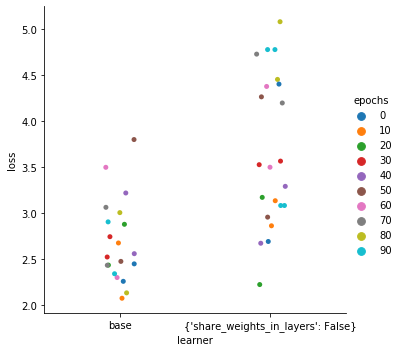

In [ ]:
res = compare(nbeats_learner,{'dbunch':data},{'dbunch':data, 'share_weights_in_layers':False}, iterations=2, epochs=[10]*10)

In [2]:
# hide
from nbdev.export import *

notebook2script()

Converted 00_core.ipynb.
Converted 01_data.external.ipynb.
Converted 02_data.load.ipynb.
Converted 03_data.core.ipynb.
Converted 05_nbeats.models.ipynb.
Converted 06_nbeats.callbacks.ipynb.
Converted 07_nbeats.learner.ipynb.
Converted 08_nbeats.interpret.ipynb.
Converted 11_metrics.ipynb.
Converted 12_compare.ipynb.
Converted index.ipynb.
